# <center>Laboratorium 12<br>Metody Numeryczne</center>    


Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union, Callable
import scipy as sp
from scipy.integrate import solve_ivp


In [3]:
def solve_euler(fun: Callable, t_span: np.array, y0: np.array):
    if type(y0) is not list:
            y0 = [y0]

    result = np.zeros((len(y0), len(t_span)))
    result[:,0] = y0
        
    for i in range(0, len(t_span) - 1):
        h = (t_span[i + 1] - t_span[i])
        result[:, i + 1] = result[:, i] + np.array(fun(t_span[i], result[:, i])) * h
    return result

**Zadanie 1.**  
Za pomocą funkcji [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp) przy wykorzystaniu dwóch metod **RK45** i **RK23** rozwiąż wszystkie równania z poprzedniego laboratorium i porównaj wyniki z zaimplementowaną metodą Eulera w przód.

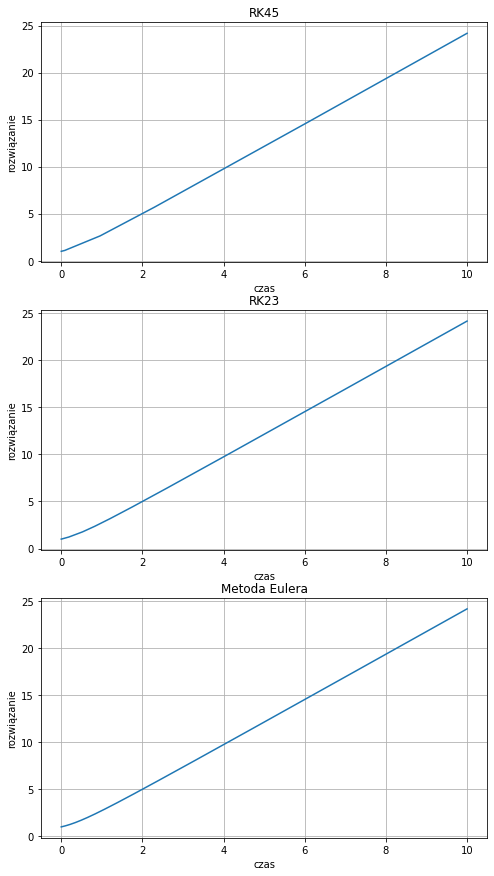

In [20]:
y = [1]
t = np.arange(0, 10, step=0.001)

def fun1(t, x):
    return (x + t) / (x - t)

result_euler = solve_euler(fun1, t, y)
rk45 = solve_ivp(fun1, (0, 10), y, method="RK45")
rk23 = solve_ivp(fun1, (0, 10), y, method="RK23")

fig = plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.plot(rk45.t, rk45.y.T)
plt.title('RK45')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(rk23.t, rk23.y.T)
plt.title("RK23")
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, result_euler[0])
plt.title('Metoda Eulera')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()
plt.show()

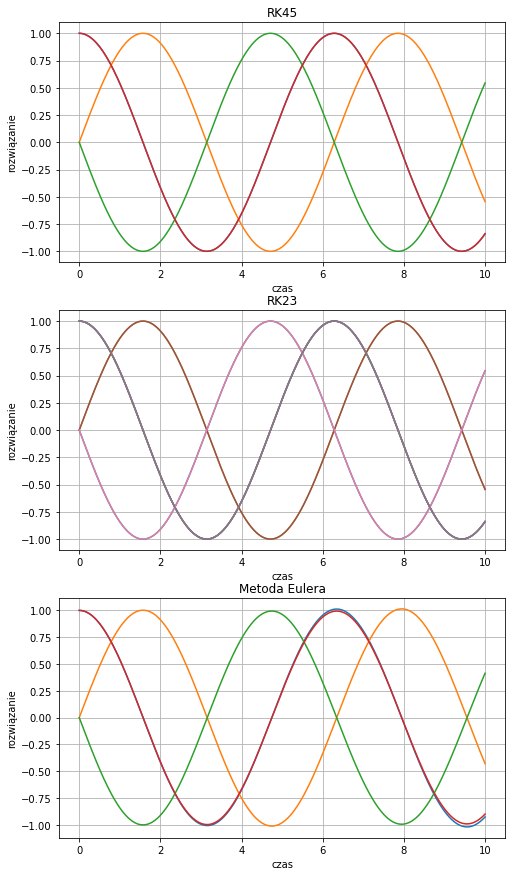

In [21]:
y = [1, 0, 0, 1]
t = np.arange(0, 10, step=0.001)

def fun2(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0] / ((x[0] ** 2 + x[1] ** 2) ** (3 / 2))
    x4 = -x[1] / ((x[0] ** 2 + x[1] ** 2) ** (3 / 2))
    return np.array([x1, x2, x3, x4])

result_euler = solve_euler(fun2, t, y)
rk45 = solve_ivp(fun2, (0, 10), y, method="RK45", max_step=0.001)
rk23 = solve_ivp(fun2, (0, 10), y, method="RK23", max_step=0.001)

fig = plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
for i in [0, 1, 2, 3]:
    plt.plot(rk45.t, rk45.y[i])
plt.title('RK45')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()

plt.subplot(3, 1, 2)
for i in [0, 1, 2, 3]:
    plt.plot(rk23.t, rk23.y[i])
plt.plot(rk23.t, rk23.y.T)
plt.title("RK23")
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, result_euler[0])
plt.plot(t, result_euler[1])
plt.plot(t, result_euler[2])
plt.plot(t, result_euler[3])
plt.title('Metoda Eulera')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()
plt.show()


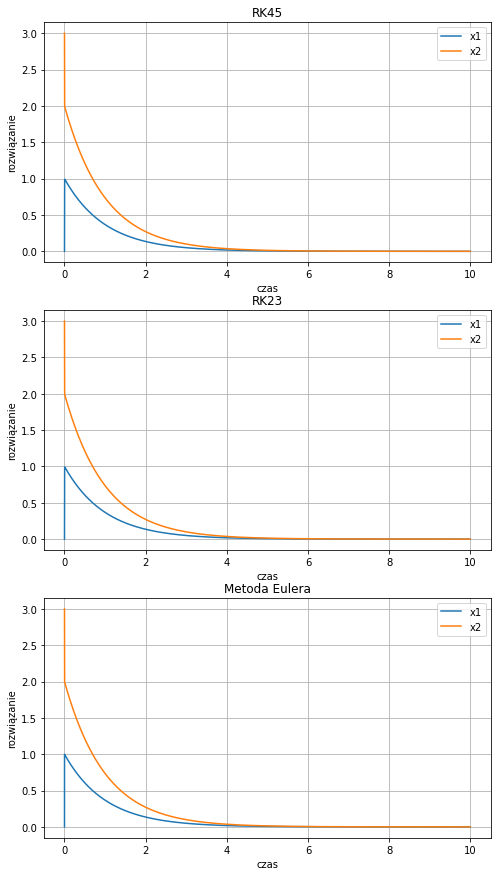

In [22]:
t = np.arange(0, 10, step=0.001)
y = [0, 3]

def fun3(t, x):
    A = np.array([[-667, 333], [666, -334]])
    return A @ x

result_euler = solve_euler(fun3, t, y)
rk45 = solve_ivp(fun3, (0, 10), y, method="RK45", max_step=0.001)
rk23 = solve_ivp(fun3, (0, 10), y, method="RK23", max_step=0.001)

fig = plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.plot(rk45.t, rk45.y[0], label='x1')
plt.plot(rk45.t, rk45.y[1], label='x2')
plt.title('RK45')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(rk23.t, rk23.y[0], label='x1')
plt.plot(rk45.t, rk45.y[1], label='x2')
plt.title("RK23")
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, result_euler[0], label='x1')
plt.plot(t, result_euler[1], label='x2')
plt.title('Metoda Eulera')
plt.xlabel('czas')
plt.ylabel('rozwiązanie')
plt.grid()
plt.legend()
plt.show()

No handles with labels found to put in legend.


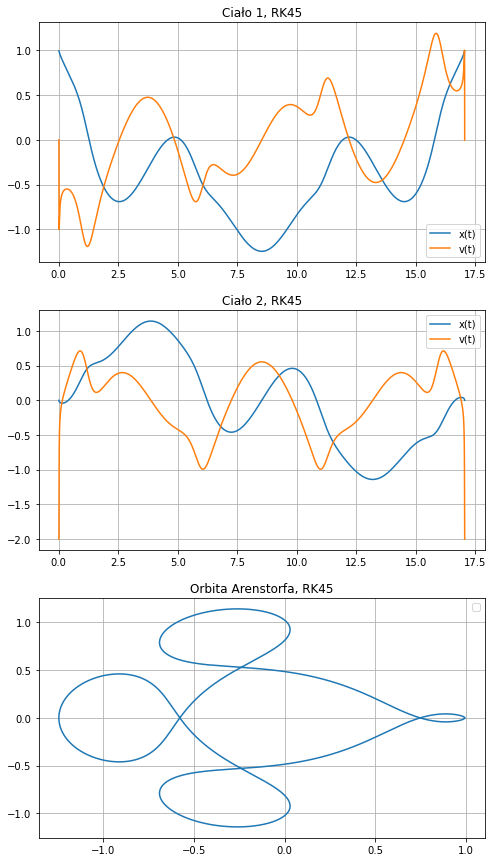

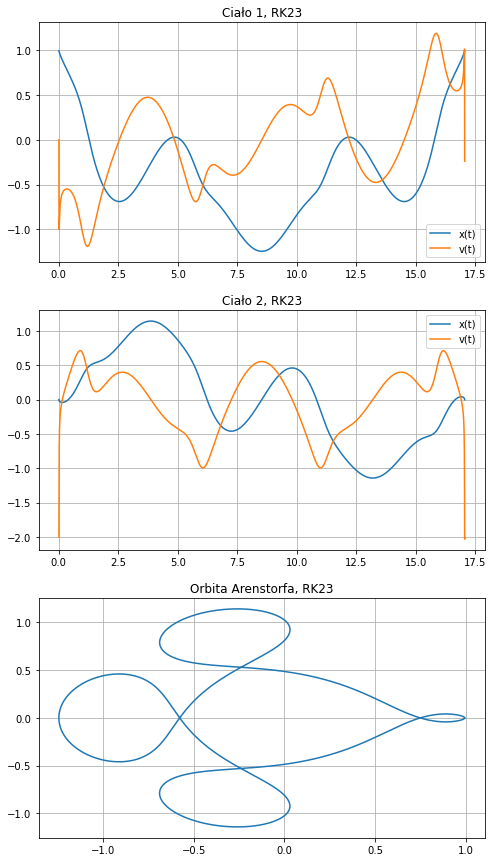

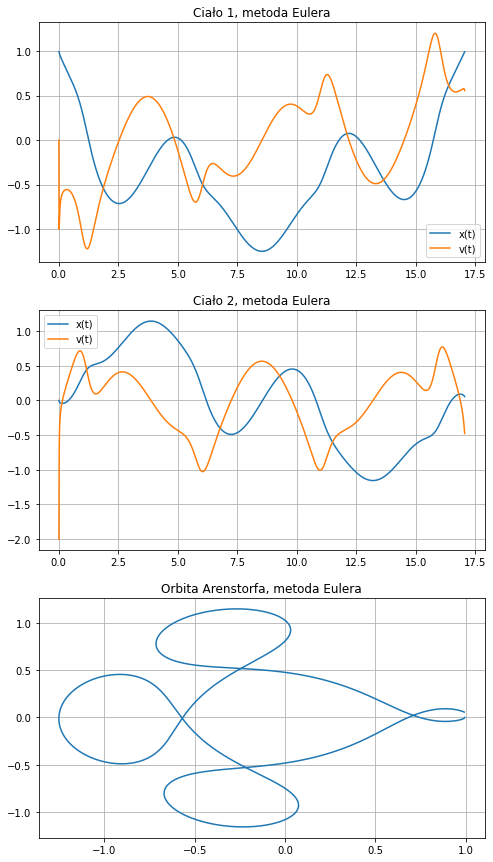

In [5]:
y = [0.994, 0, 0, -2.00158510637908252240537862224]
T = 17.0652165601579625588917206249

def arenstorf_orbit(t, x):
    u = 0.012277471
    D1 = ((x[0] + u) ** 2 + (x[2]) ** 2) ** (3 / 2)
    D2 = ((x[0] - (1 - u)) ** 2 + (x[2]) ** 2) ** (3 / 2)
    
    x1 = x[1]
    x2 = x[0] + 2*x[3] - (1-u)*((x[0]+u)/D1) - u*((x[0]-(1-u))/D2)
    x3 = x[3]
    x4 = x[2] - 2*x[1] - (1-u)*(x[2]/D1) - u*(x[2]/D2)
    
    return x1, x2, x3, x4

orbit45 = solve_ivp(arenstorf_orbit, (0, T), y, method="RK45", max_step=0.001)
orbit23 = solve_ivp(arenstorf_orbit, (0, T), y, method="RK23", max_step=0.001)

fig = plt.figure(figsize=(8,15))
plt.subplot(3, 1, 1)
plt.plot(orbit45.t, orbit45.y[0], label='x(t)')
plt.plot(orbit45.t, orbit45.y[1], label='v(t)')
plt.title('Ciało 1, RK45')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(orbit45.t, orbit45.y[2], label='x(t)')
plt.plot(orbit45.t, orbit45.y[3], label='v(t)')
plt.title('Ciało 2, RK45')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(orbit45.y[0], orbit45.y[2])
plt.title('Orbita Arenstorfa, RK45')
plt.legend()
plt.grid()
plt.show()

fig = plt.figure(figsize=(8,15))
plt.subplot(3, 1, 1)
plt.plot(orbit23.t, orbit23.y[0], label='x(t)')
plt.plot(orbit23.t, orbit23.y[1], label='v(t)')
plt.title('Ciało 1, RK23')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(orbit23.t, orbit23.y[2], label='x(t)')
plt.plot(orbit23.t, orbit23.y[3], label='v(t)')
plt.title('Ciało 2, RK23')
plt.grid()
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(orbit23.y[0], orbit23.y[2])
plt.title('Orbita Arenstorfa, RK23')
plt.grid()
plt.show()

t_span = np.arange(0, T, step=0.00001)
orbit = solve_euler(arenstorf_orbit, t_span, y)

fig = plt.figure(figsize=(8,15))

plt.subplot(3, 1, 1)
plt.plot(t_span, orbit[0], label='x(t)')
plt.plot(t_span, orbit[1], label='v(t)')
plt.title('Ciało 1, metoda Eulera')
plt.legend() 
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t_span, orbit[2], label='x(t)')
plt.plot(t_span, orbit[3], label='v(t)')
plt.title('Ciało 2, metoda Eulera')
plt.legend() 
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(orbit[0], orbit[2])
plt.title('Orbita Arenstorfa, metoda Eulera')
plt.grid()
plt.show()


WNIOSKI
Zaimplementowana na wcześniejszych zajęciach metoda Eulera w przód zwraca wyniki zbliżone do metod RK45 i RK23.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
